## Zadanie 2.
a) Zaimplementuj algorytm PBIL.

b) Sprawdź jego działanie na kilku prostych testowych problemach optymalizacji (OneMax, Deceptive OneMax, K-Deceptive OneMax). Eksperymenty obliczeniowe wykonaj dla różnych wielkości problemu i różnych ustawień algorytmu. Dokładnie przeanalizuj wyniki.

In [1]:
import numpy as np
import pandas as pd

from tqdm import trange, tqdm
import matplotlib.pyplot as plt

from itertools import product

from PBIL import PBIL

In [2]:
def deceptive_one_max_eval_func(population):
    evals = population.sum(axis=1)
    evals[evals == 0] = population.shape[1] + 1
    return evals

In [3]:
def k_deceptive_one_max_eval_func(population):
    idx_splits = np.linspace(0, population.shape[1], k+1).astype(int)
    evals = np.zeros(population.shape[0])
    
    for i in range(1, len(idx_splits)):
        evals += deceptive_one_max_eval_func(population[:, idx_splits[i-1] : idx_splits[i]])
        
    return evals

In [4]:
LR = MP = DR = [0.01, 0.1]

### Onemax for 10 alleles

100%|██████████| 8/8 [00:13<00:00,  1.75s/it]


Max eval: 10.0  of 10 possible


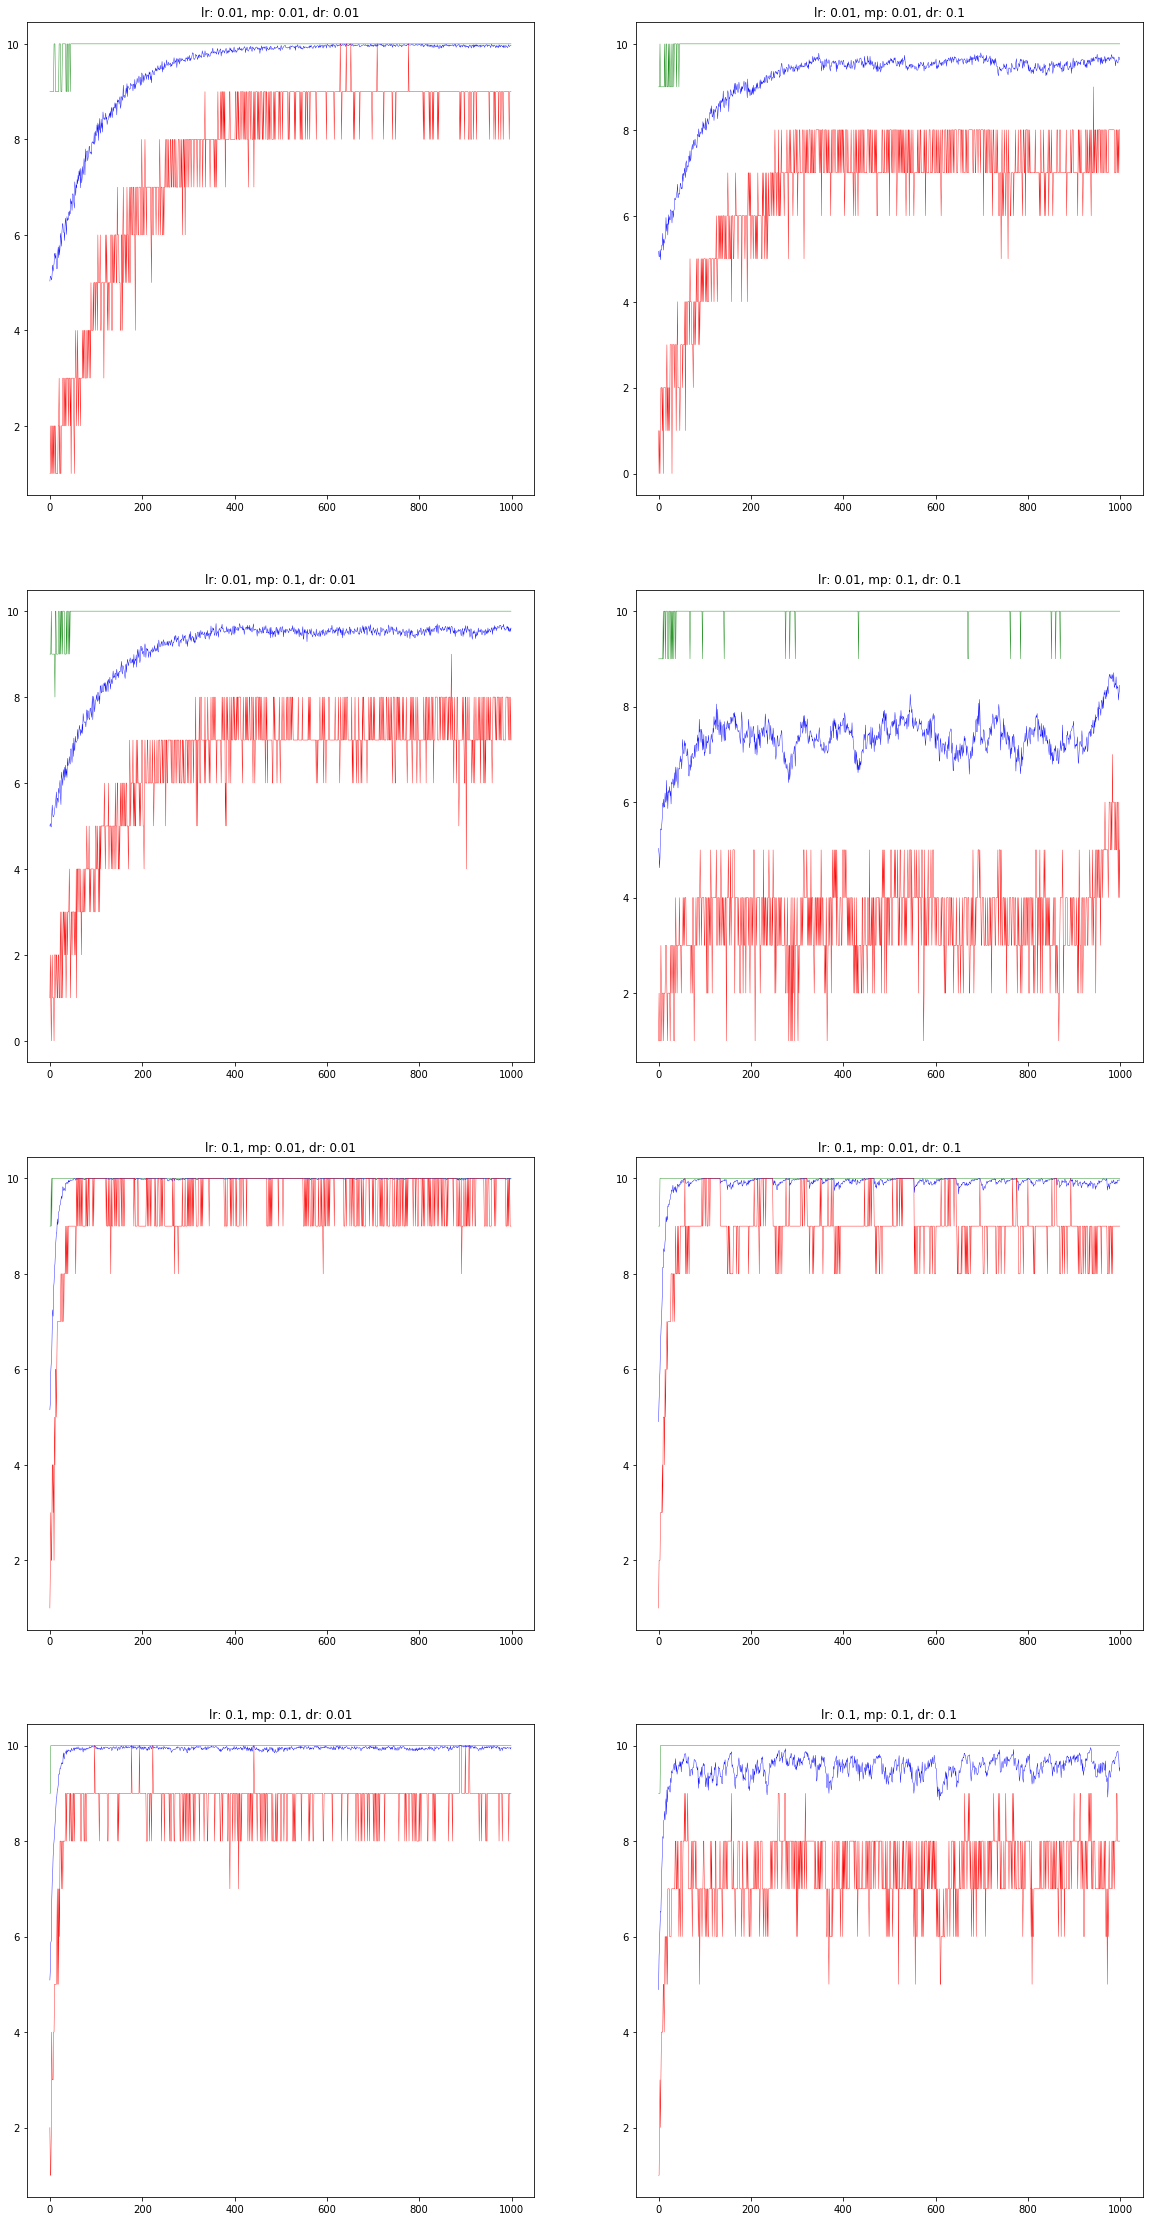

In [5]:
allele_no = 10

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no} possible')

### Onemax for 100 alleles

100%|██████████| 8/8 [01:33<00:00, 11.75s/it]


Max eval: 100.0  of 100 possible


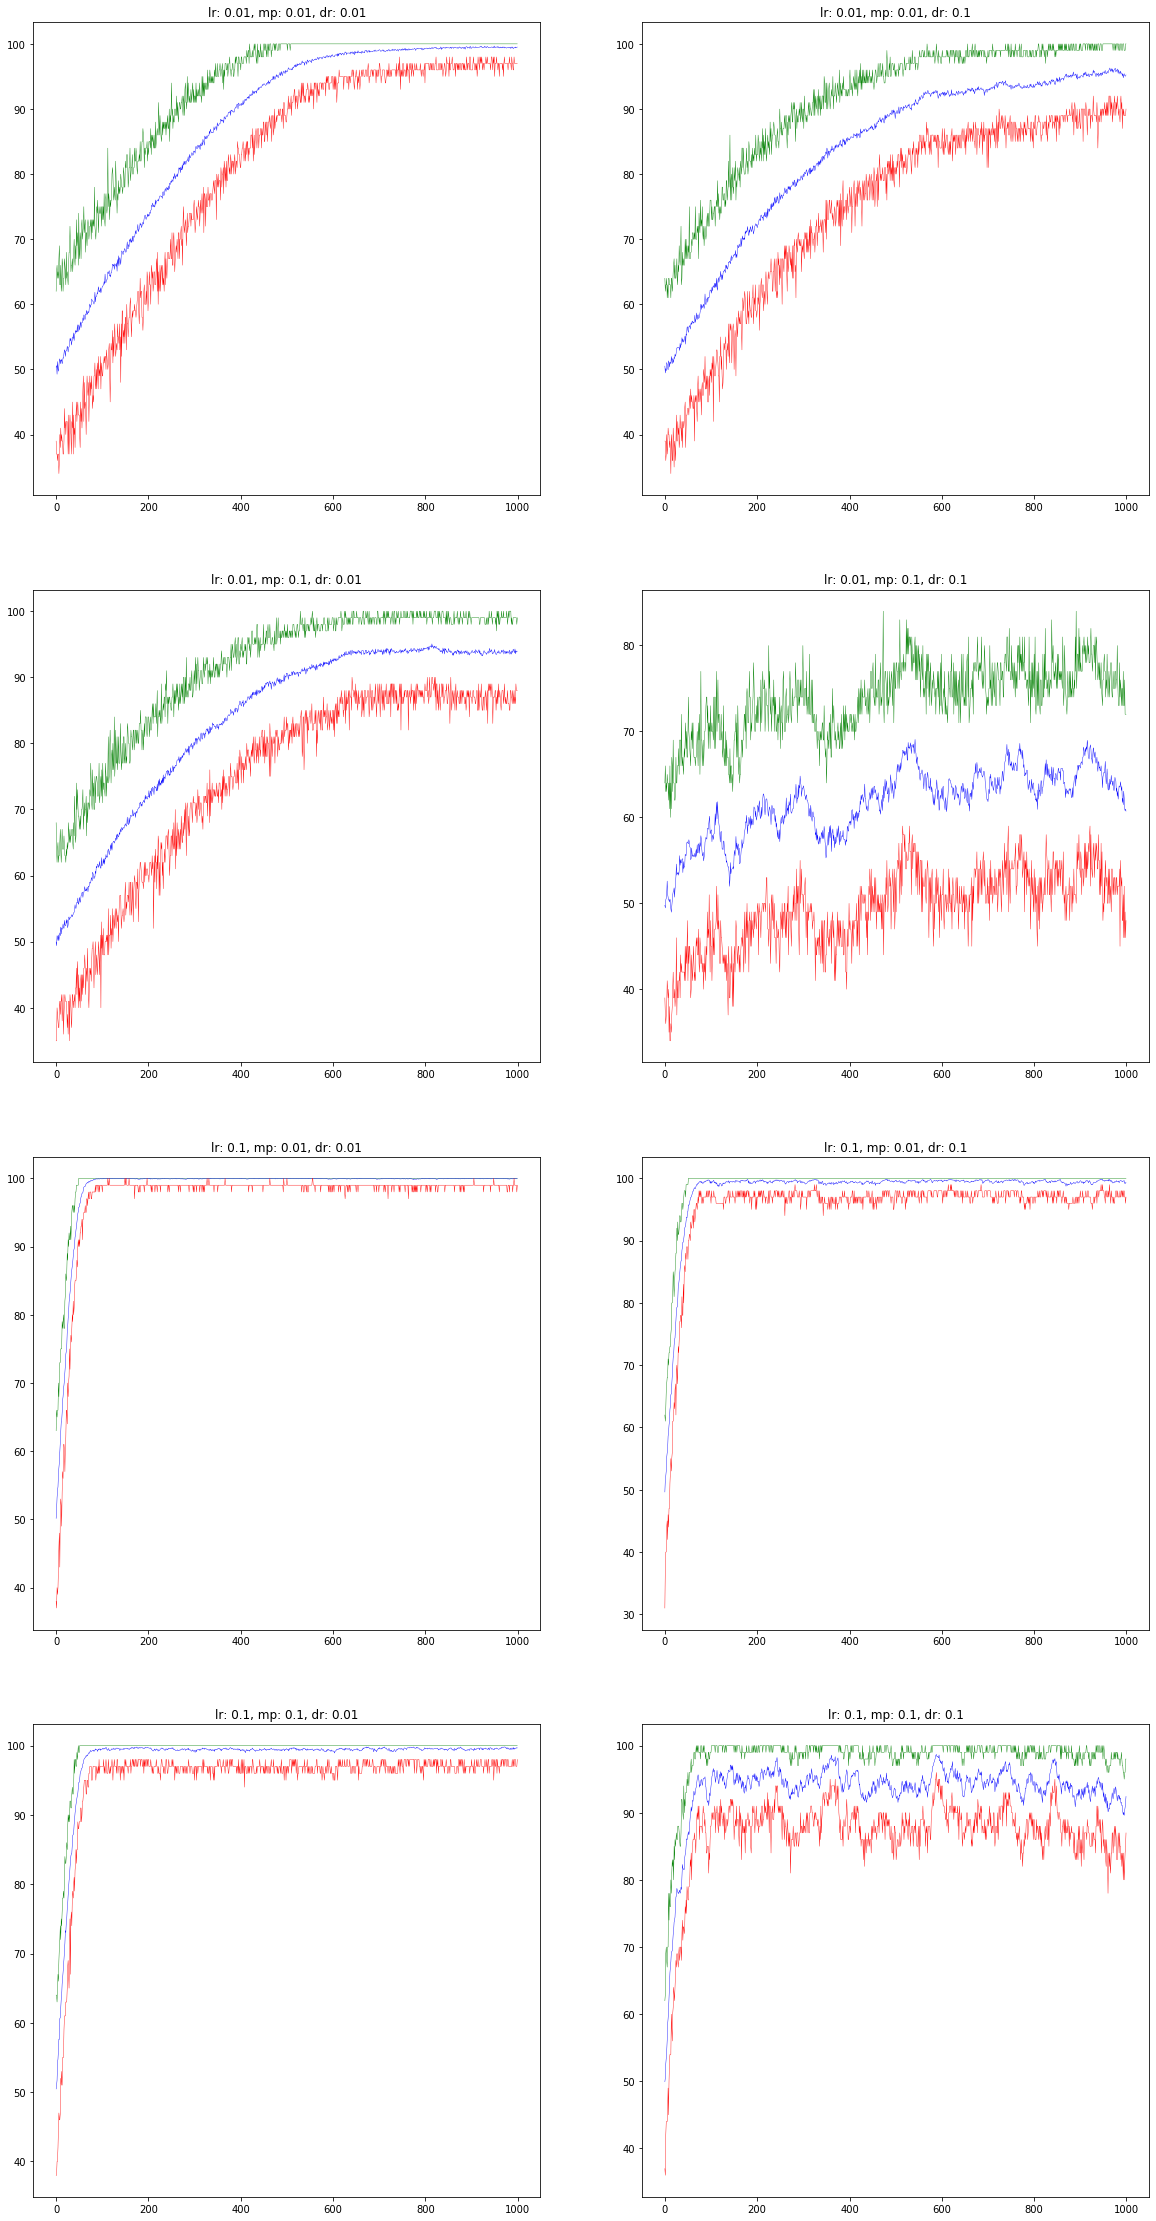

In [6]:
allele_no = 100

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no} possible')

### Deceptive Onemax for 10 alleles

100%|██████████| 8/8 [00:10<00:00,  1.34s/it]


Max eval: 11.0  of 11 possible


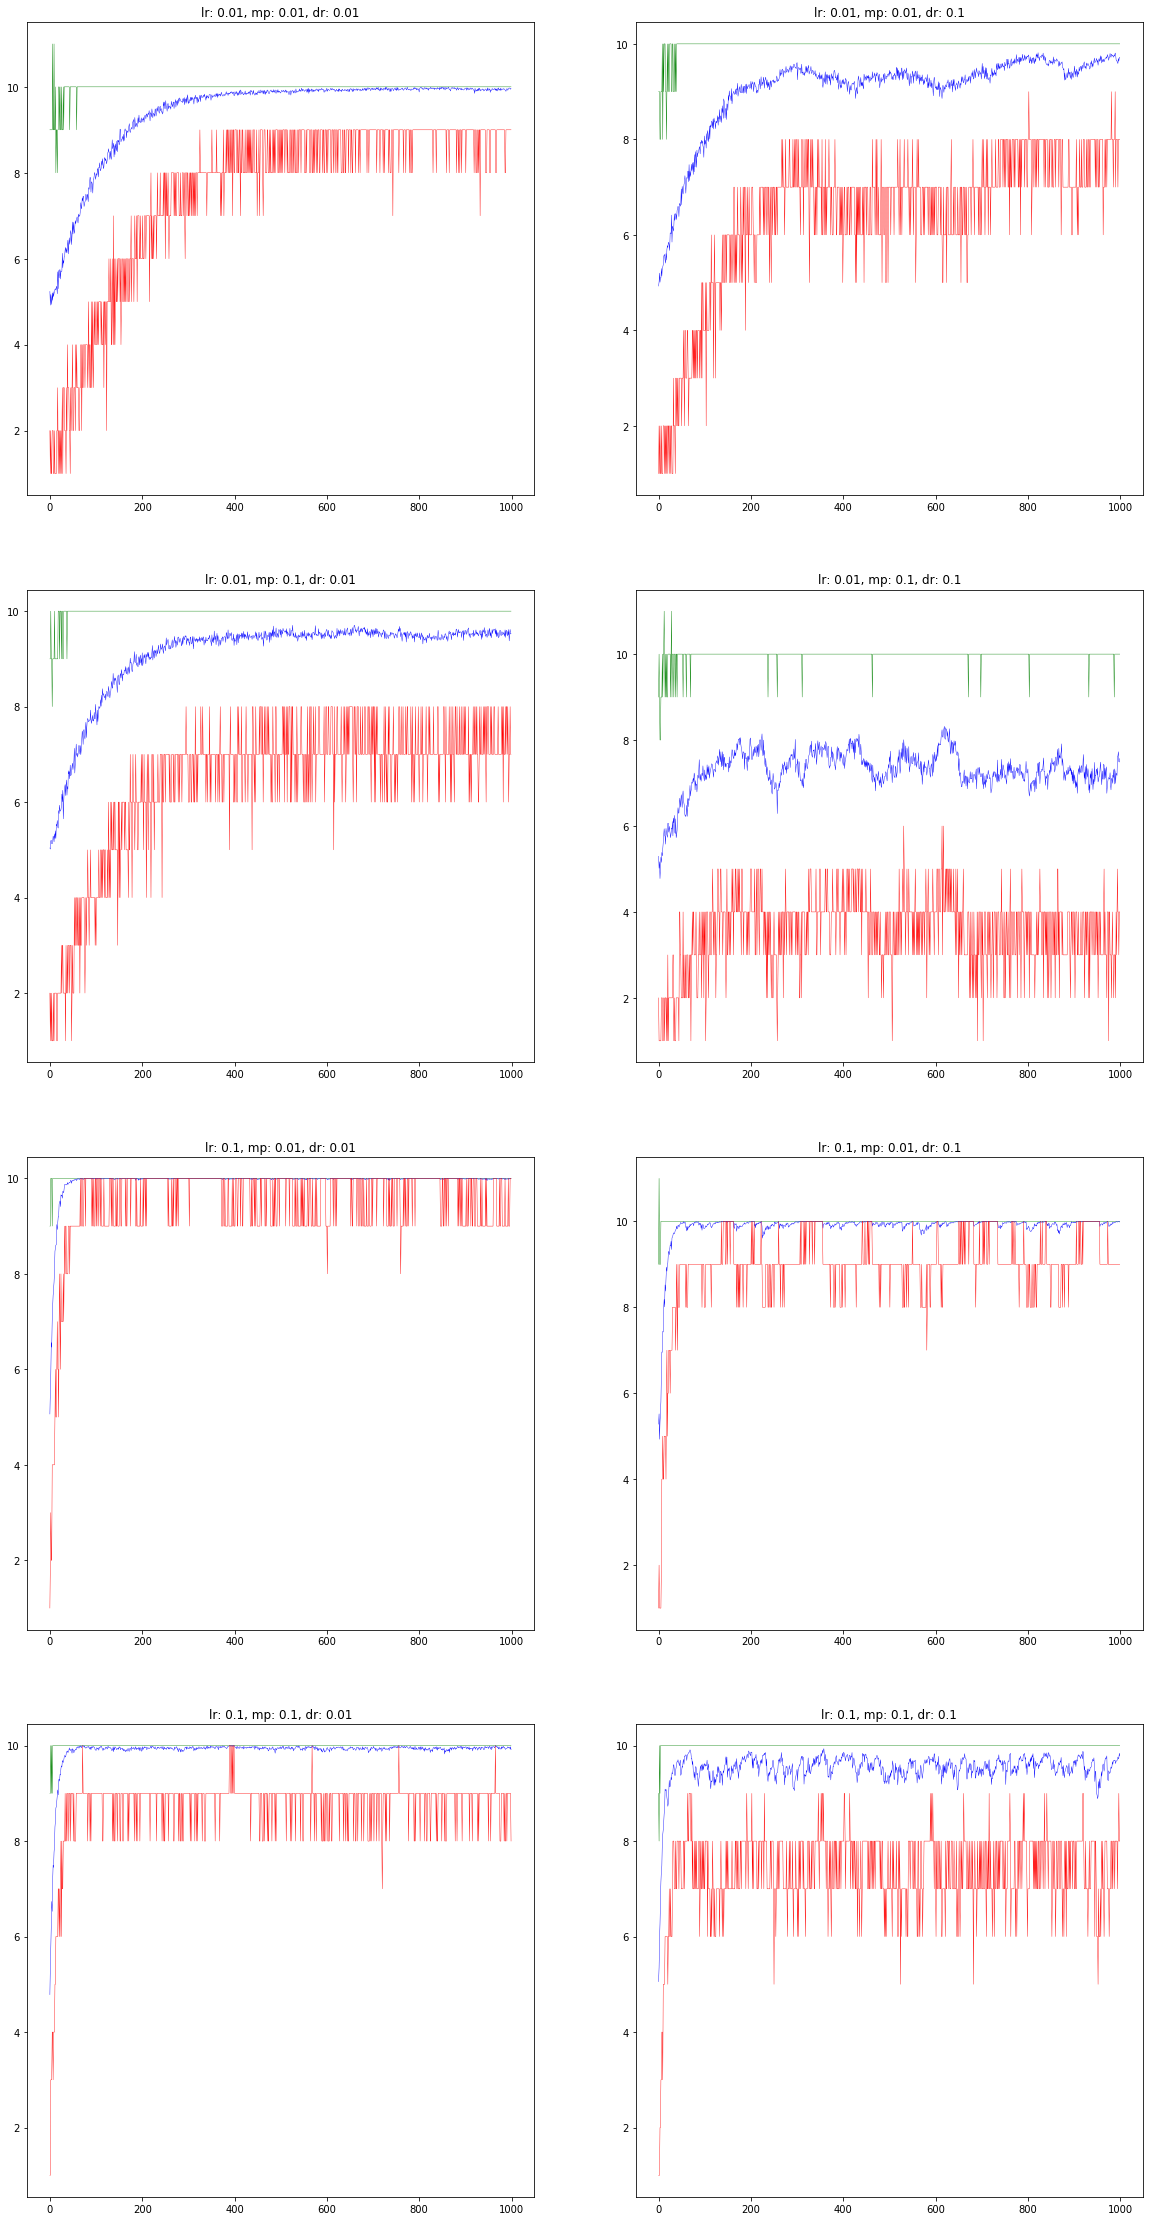

In [7]:
allele_no = 10

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+1} possible')

### Deceptive Onemax for 100 alleles

100%|██████████| 8/8 [01:17<00:00,  9.74s/it]


Max eval: 100.0  of 101 possible


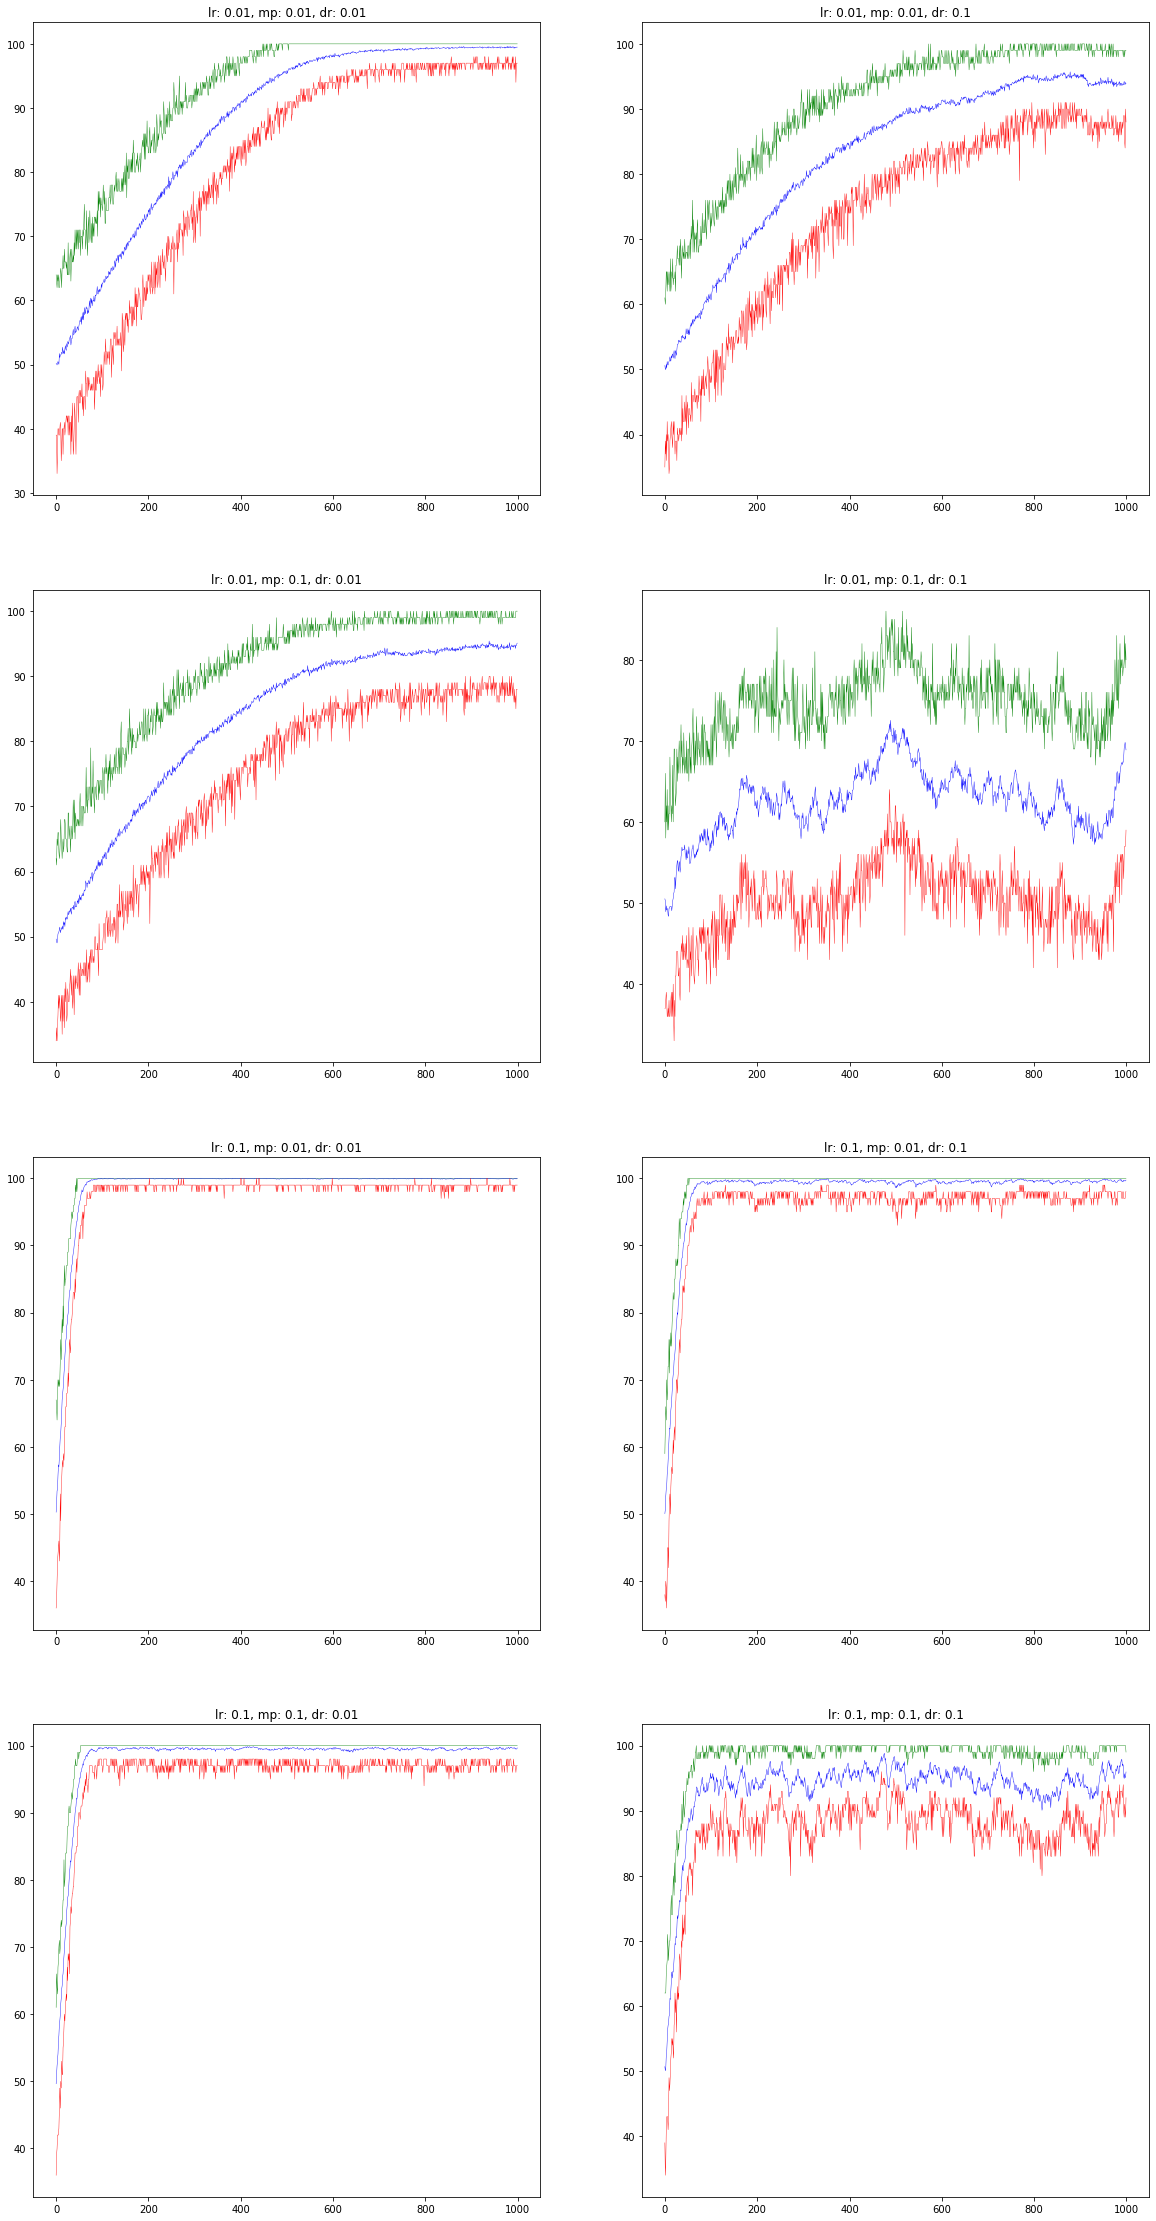

In [8]:
allele_no = 100

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+1} possible')

### K-deceptive Onemax for 10 alleles

#### k = 2

100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


Max eval: 12.0  of 12 possible


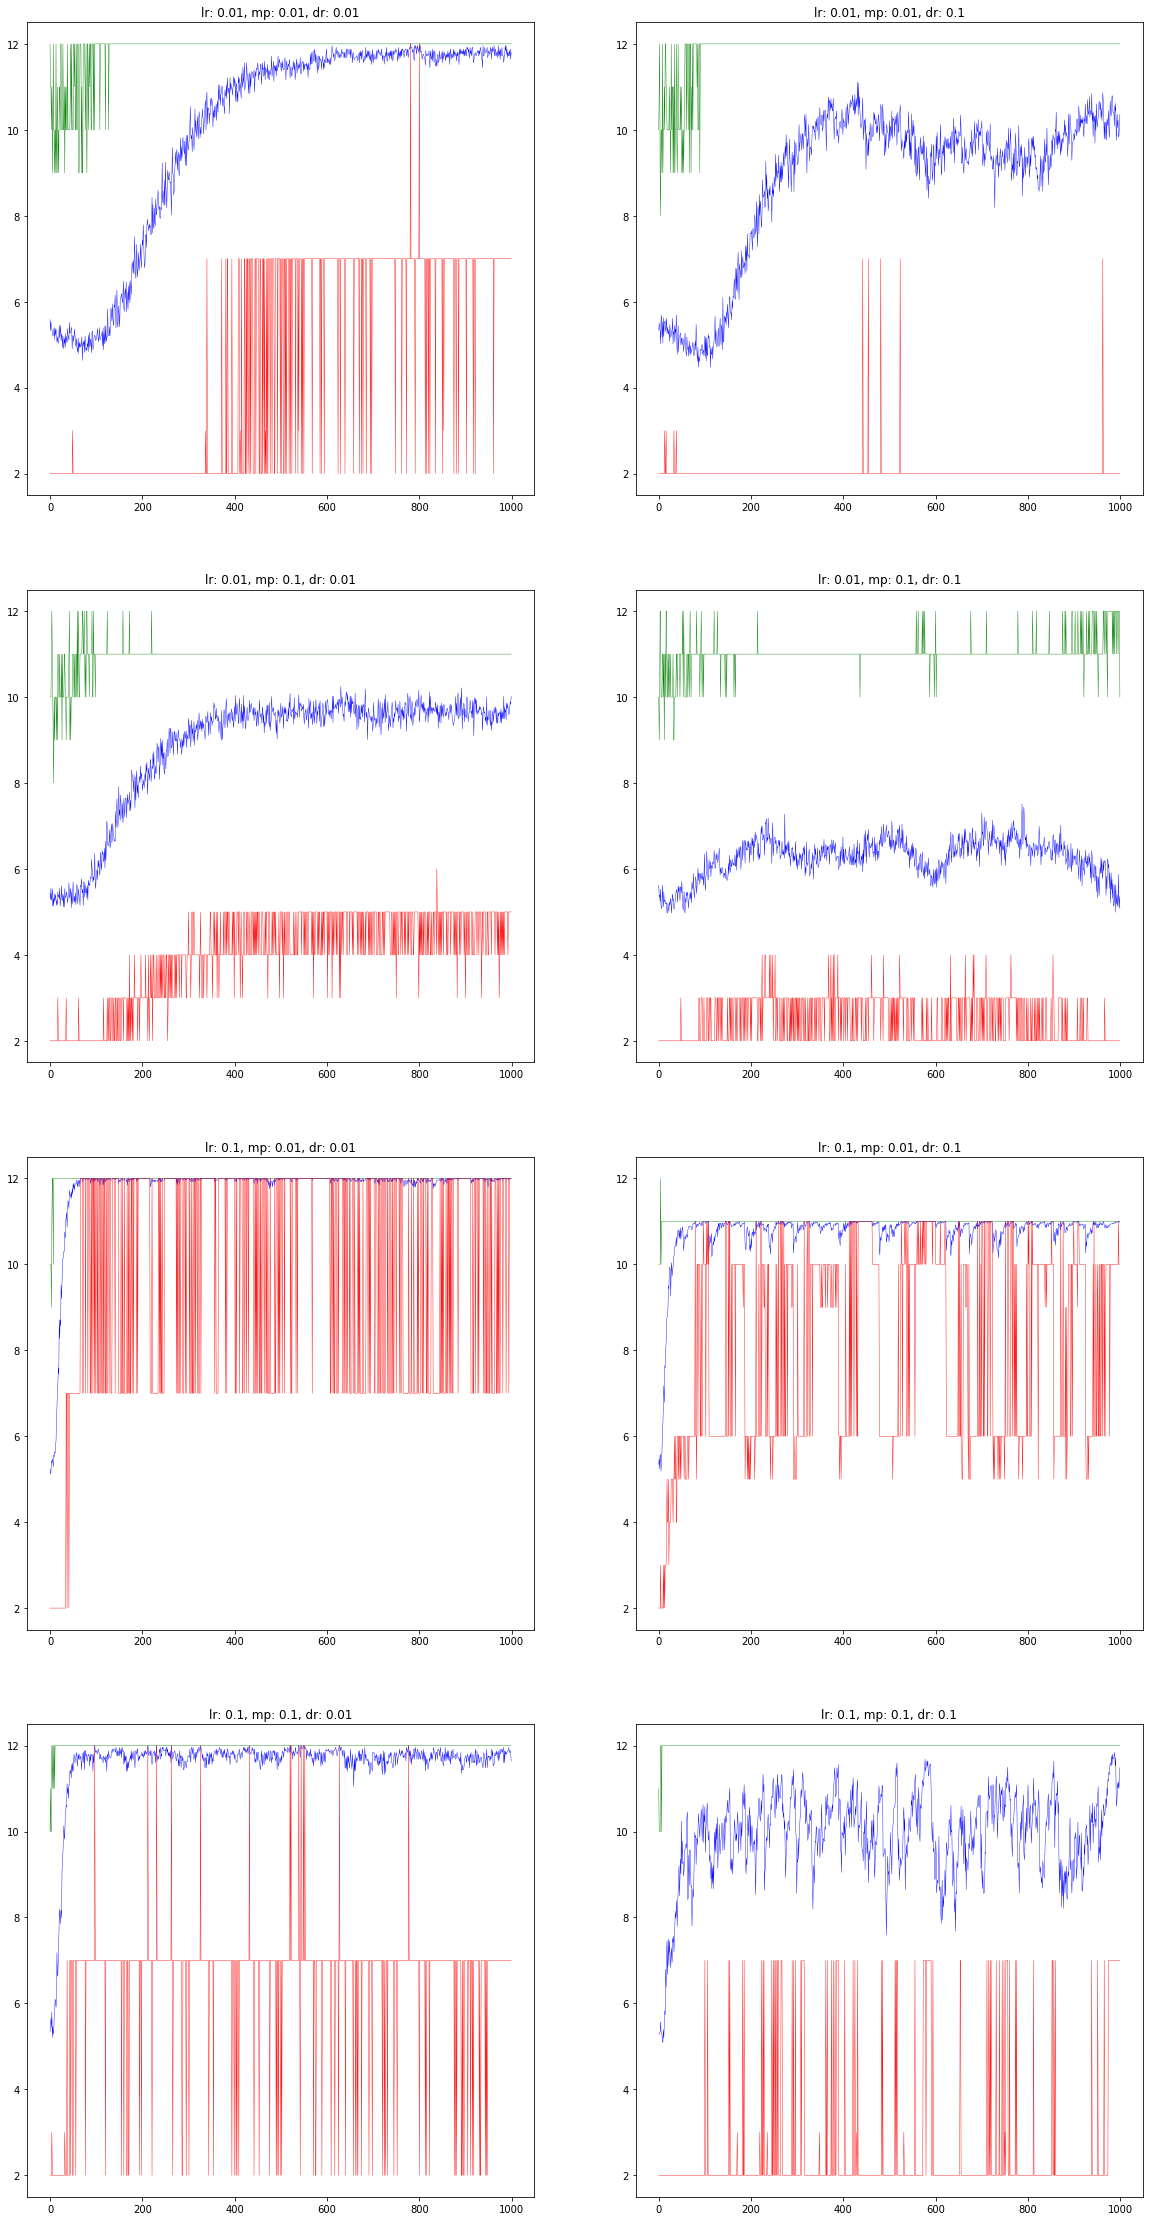

In [12]:
allele_no = 10
k = 2

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=k_deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+k} possible')

#### k = 5

100%|██████████| 8/8 [00:12<00:00,  1.52s/it]


Max eval: 15.0  of 15 possible


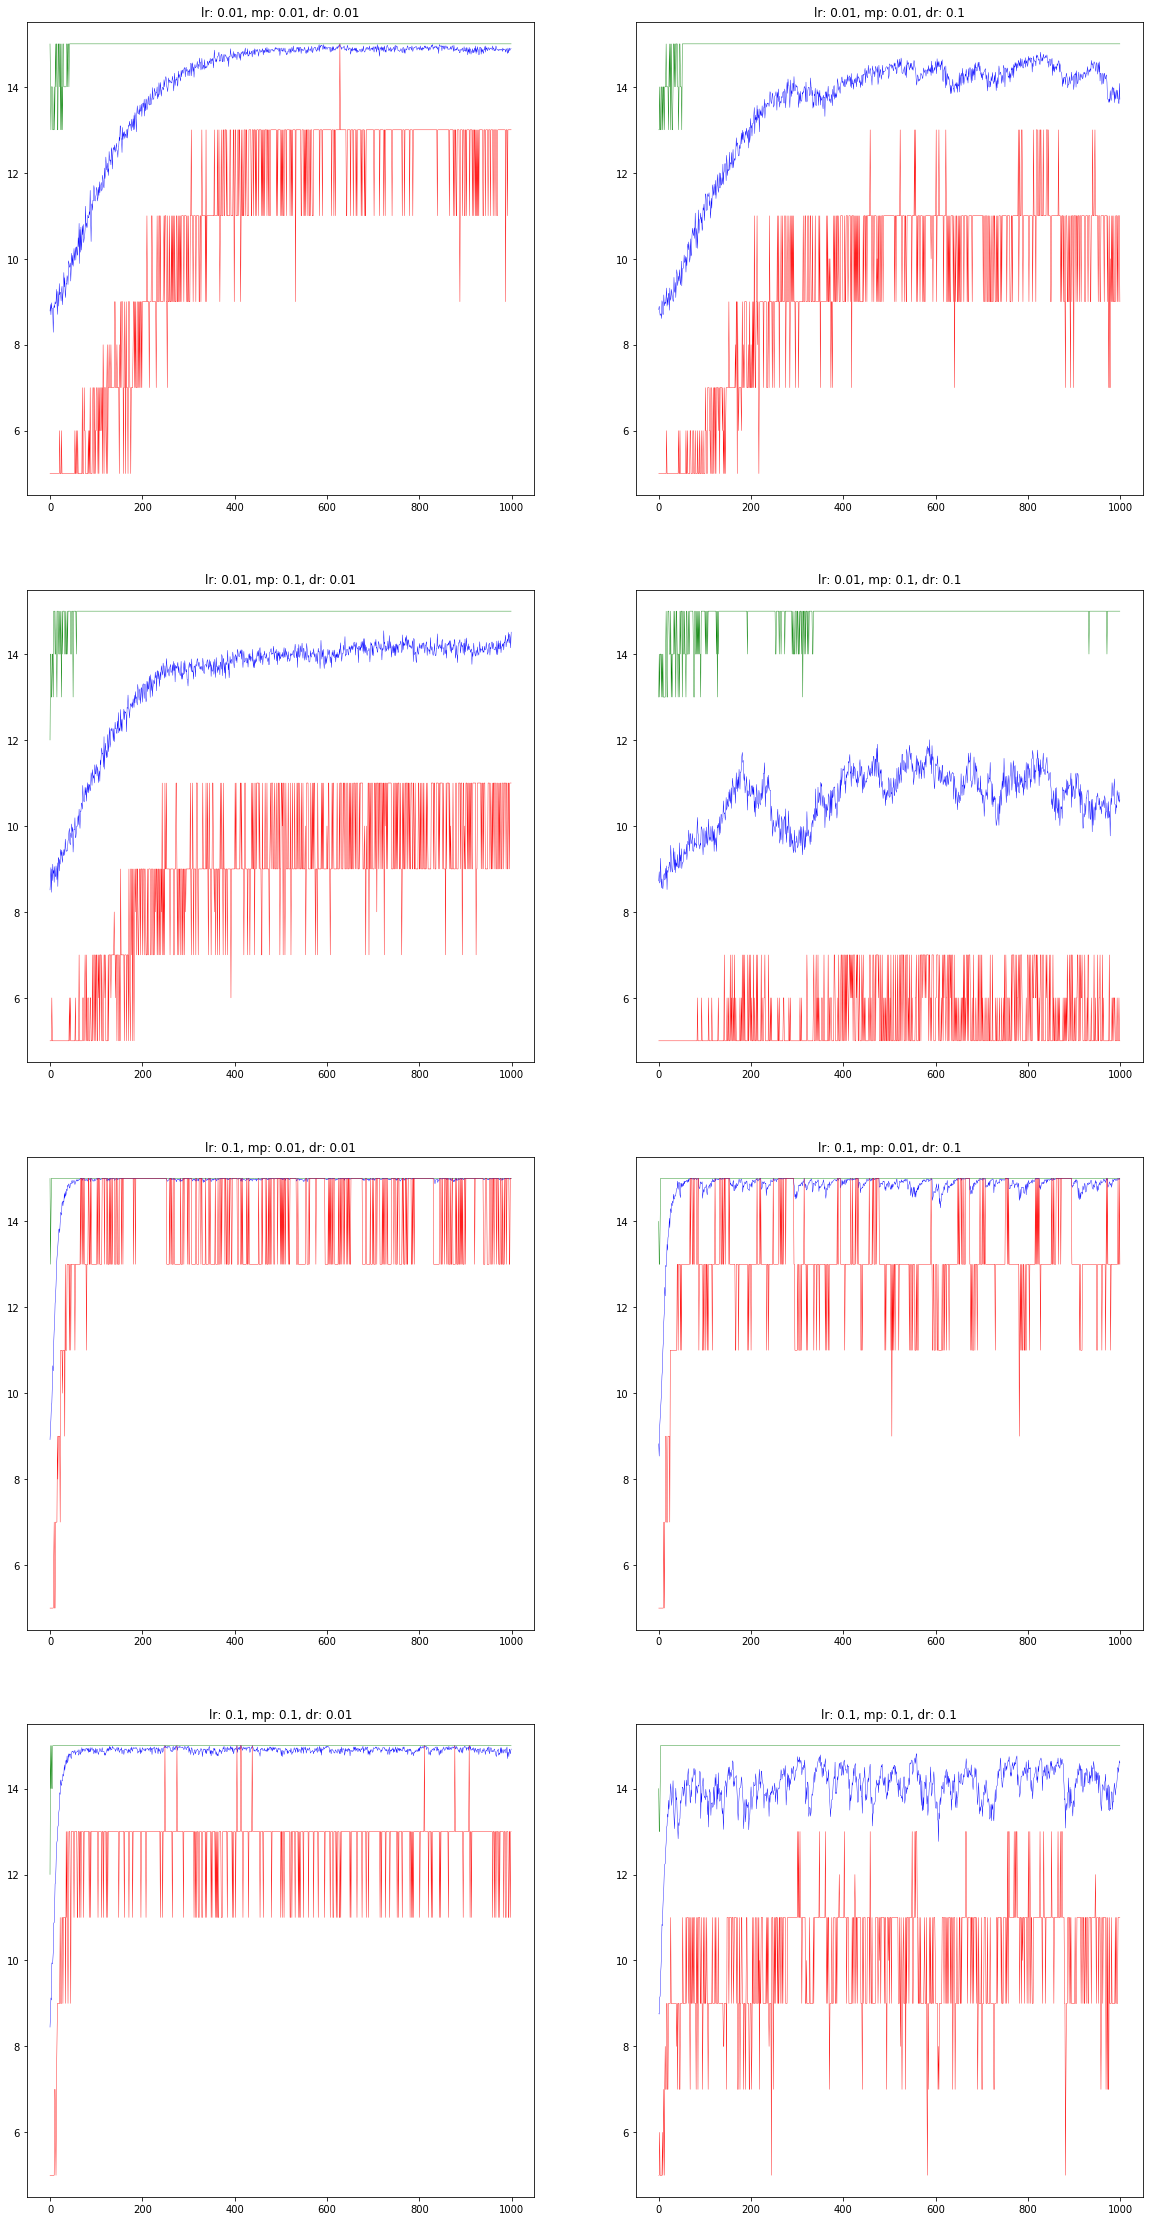

In [13]:
allele_no = 10
k = 5

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=k_deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+k} possible')

#### k = 10

### K-deceptive Onemax for 100 alleles

#### k = 5

100%|██████████| 8/8 [01:21<00:00, 10.13s/it]


Max eval: 100.0  of 105 possible


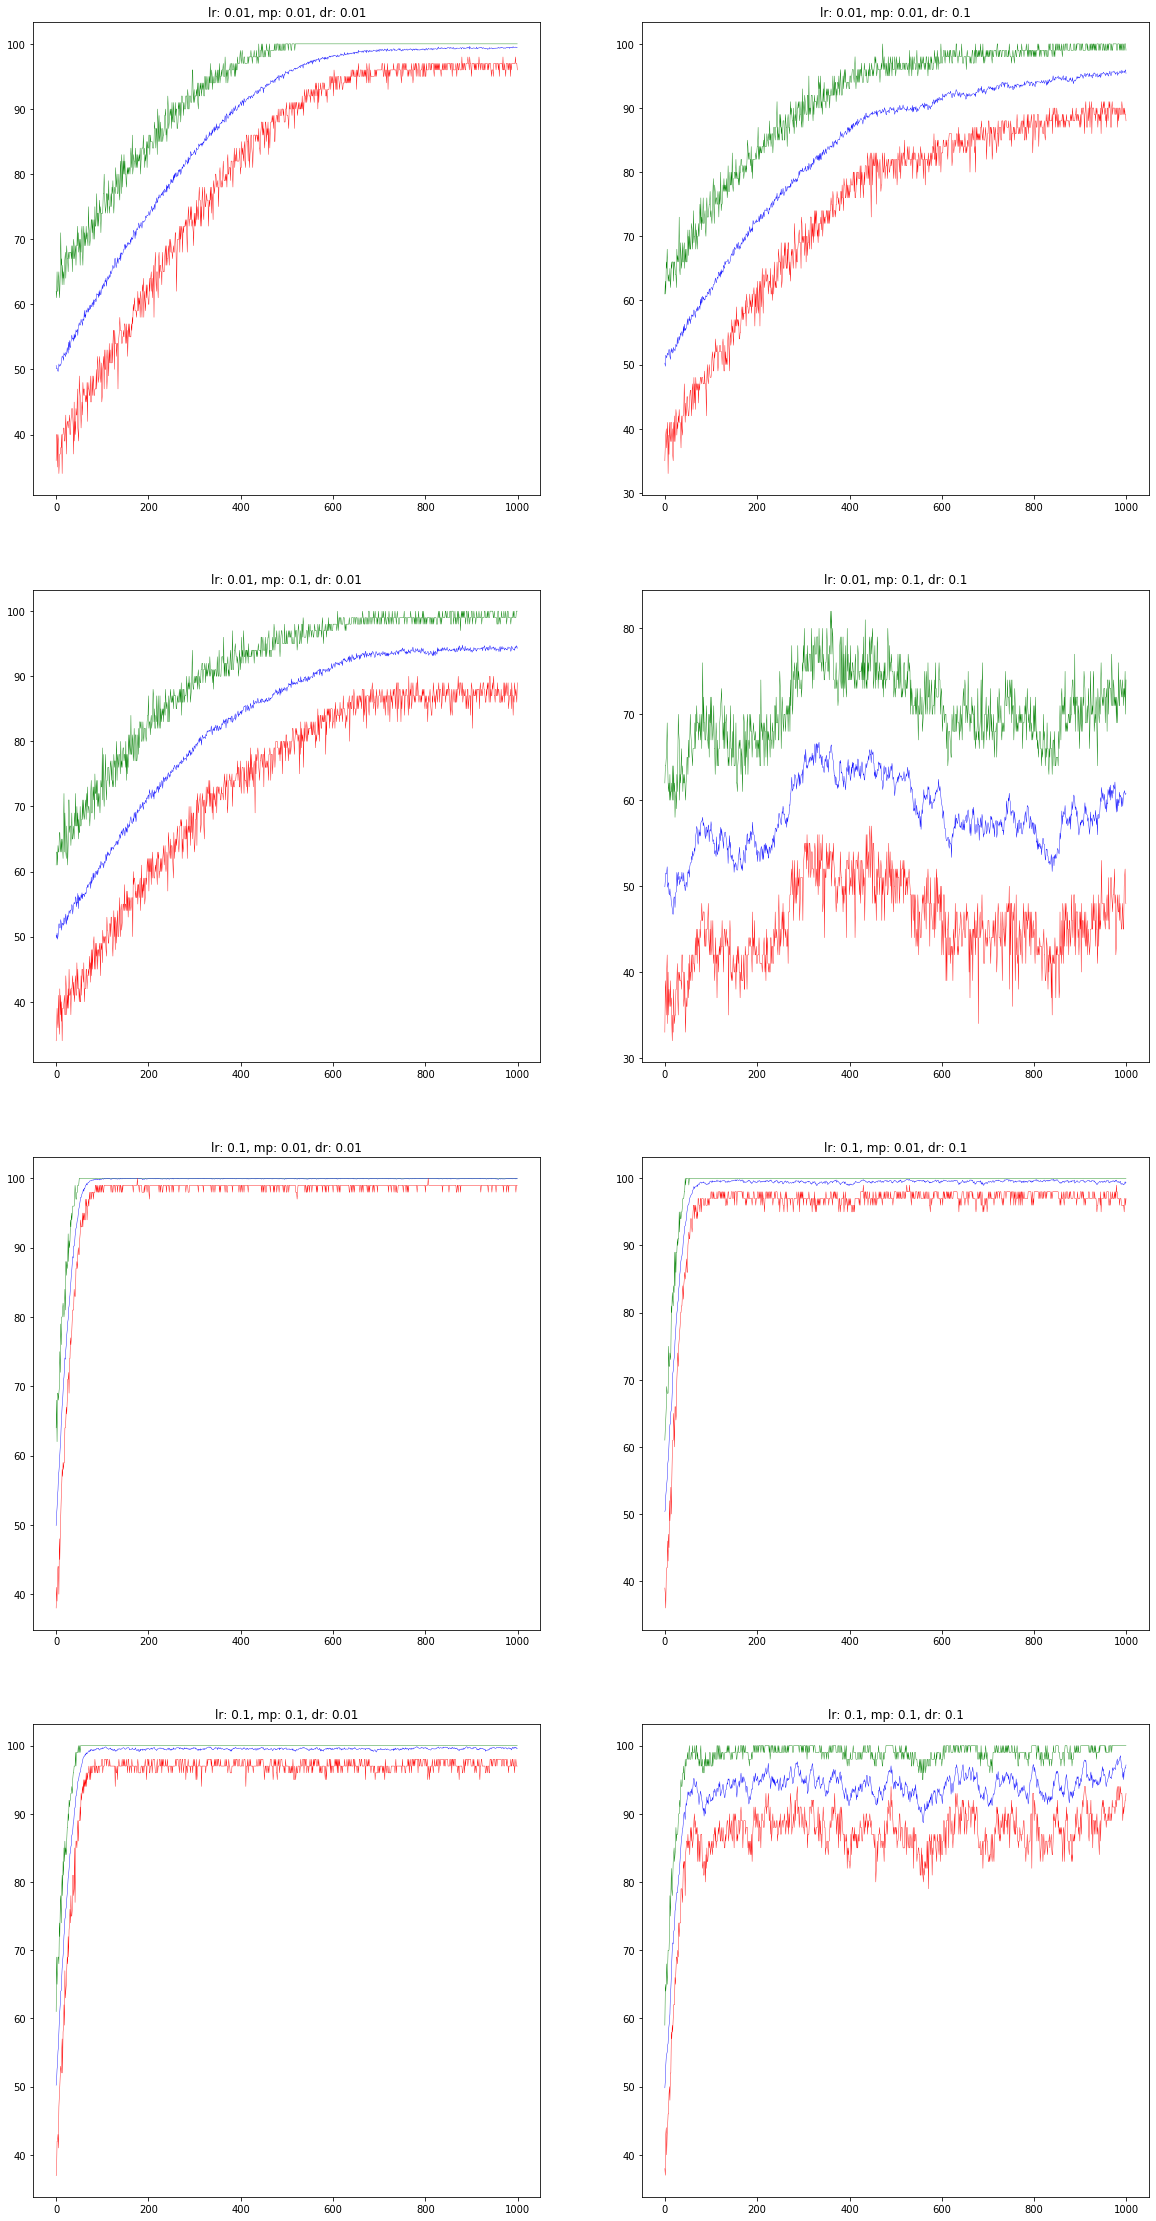

In [14]:
allele_no = 100
k = 5

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=k_deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+k} possible')

#### k = 10

100%|██████████| 8/8 [01:25<00:00, 10.74s/it]


Max eval: 100.0  of 110 possible


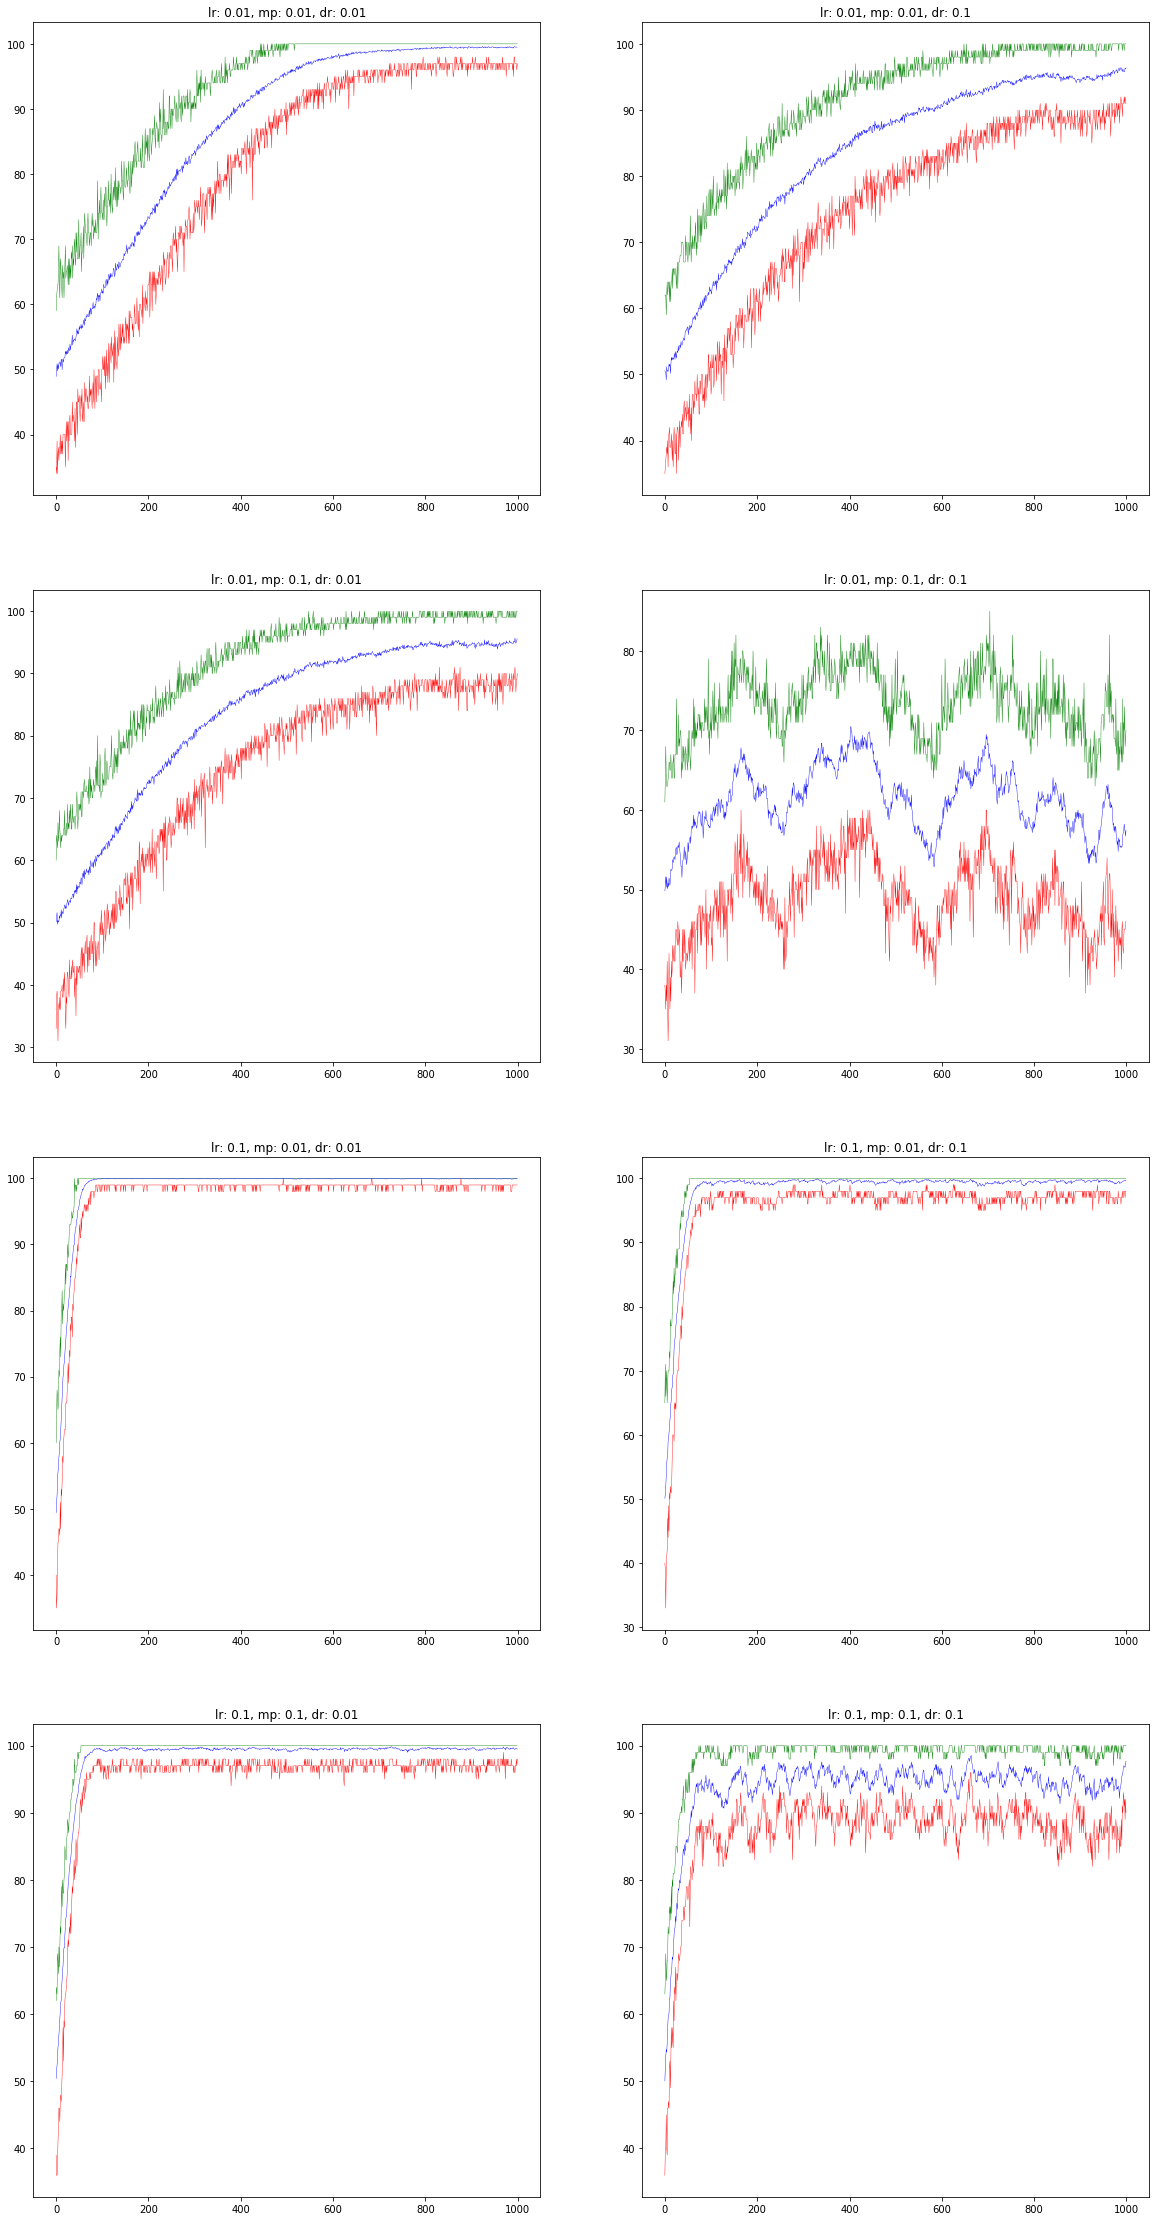

In [15]:
allele_no = 100
k = 10

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=k_deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+k} possible')

#### k = 50

100%|██████████| 8/8 [01:26<00:00, 10.84s/it]


Max eval: 150.0  of 150 possible


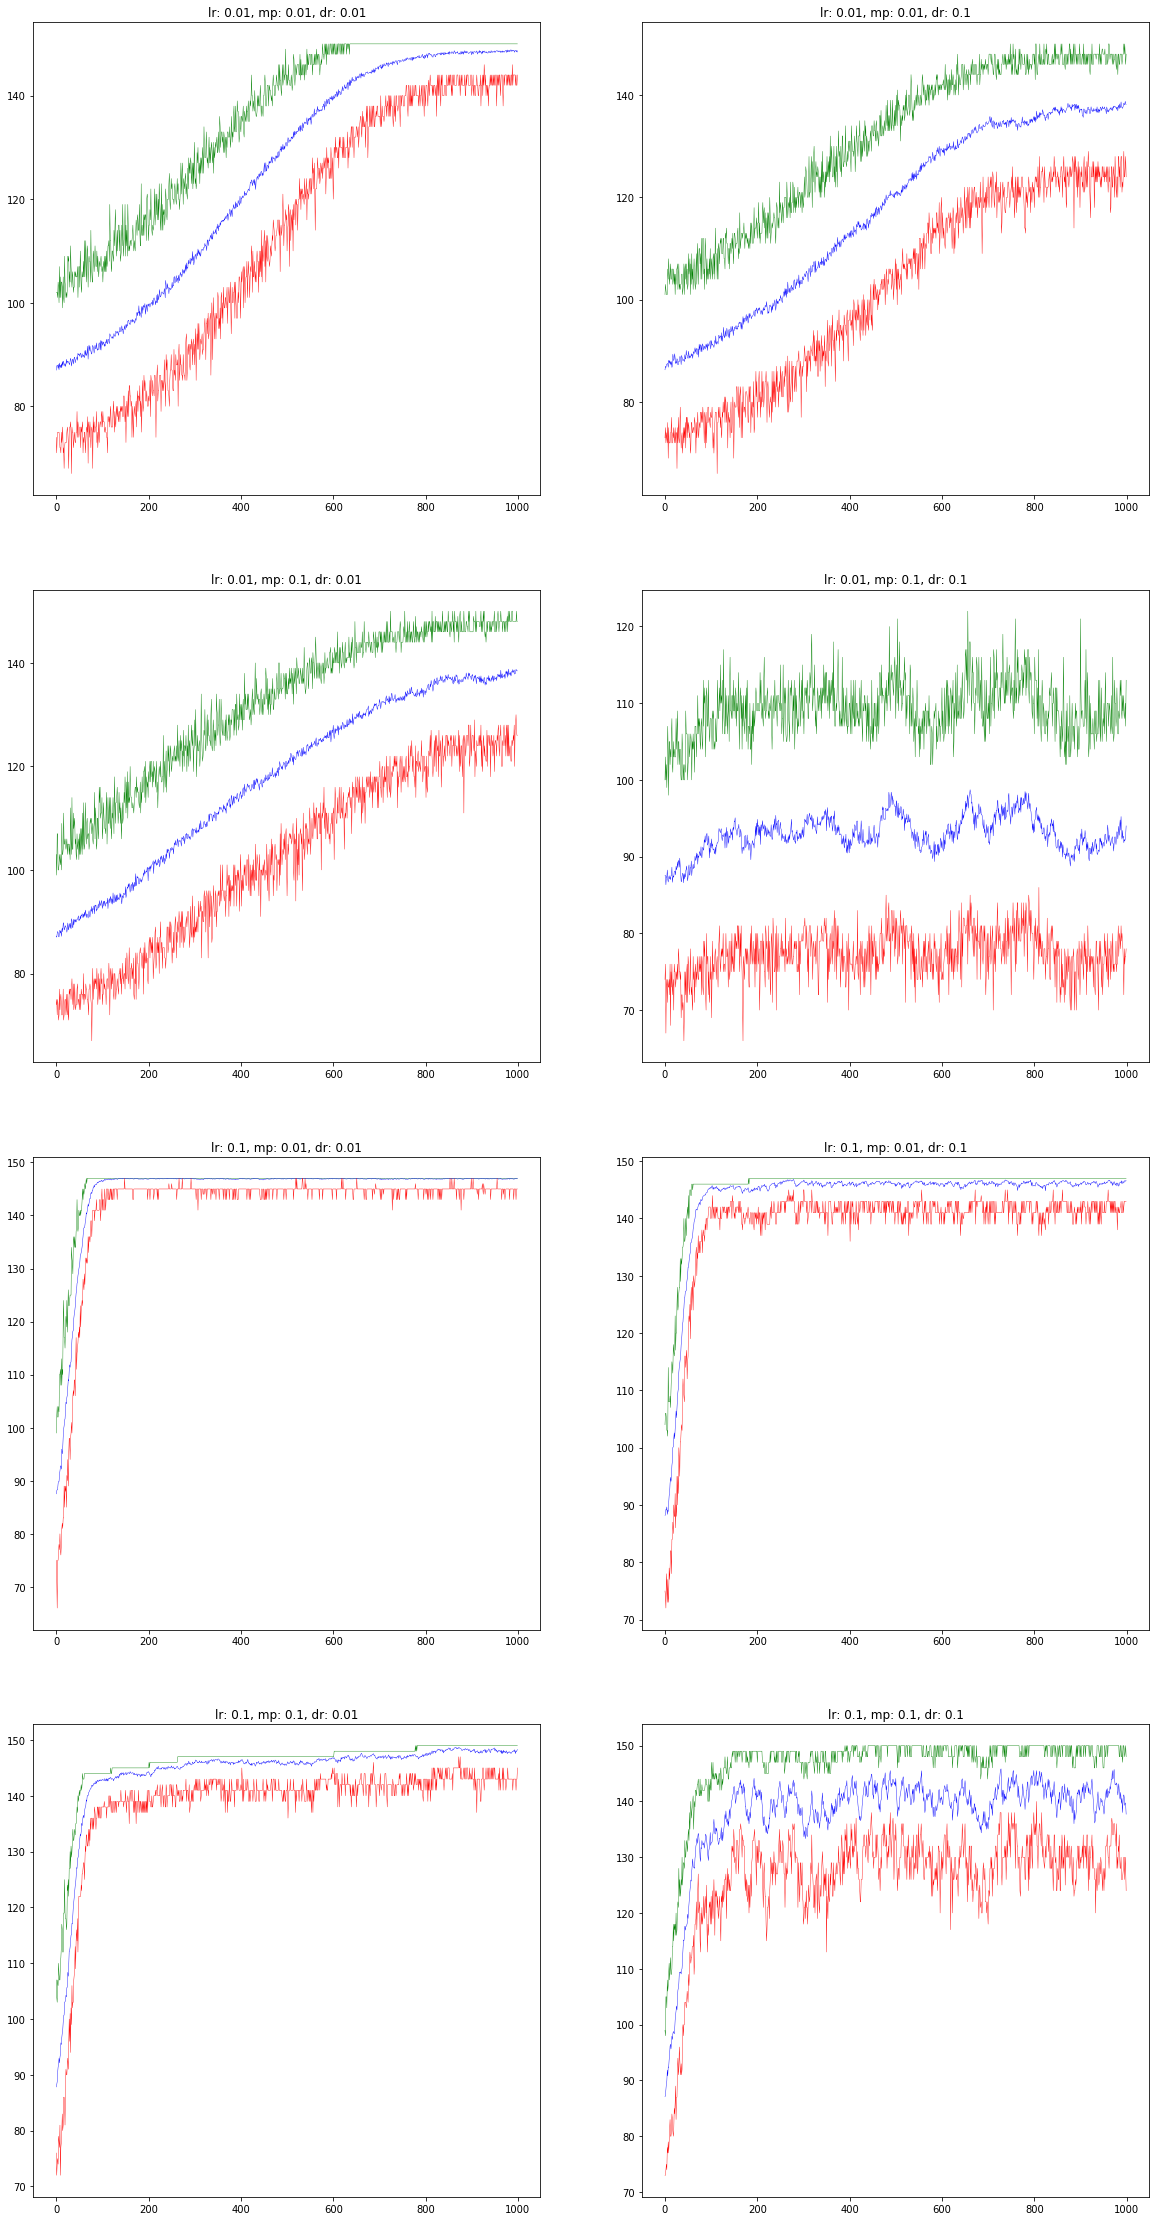

In [16]:
allele_no = 100
k = 50

fig, ax = plt.subplots(len(LR)**2, len(LR), figsize=(20, 40))
max_eval = 0

for i, (lr, mp, dr) in tqdm(enumerate(product(LR, MP, DR)), position=0, leave=True,
                            total=len(LR)**3):
    pbil = PBIL(population_size=125, learning_rate=lr, mutation_prob=mp, 
                disturbance_rate=dr, allele_no=allele_no, with_tqdm=False,
                eval_func=k_deceptive_one_max_eval_func)
    pbil.fit()
    cur_ax = ax[i//len(LR)][i%len(LR)]
    cur_ax.set_title(f'lr: {lr}, mp: {mp}, dr: {dr}')
    
    max_eval = max(max_eval, np.max(pbil.best_evals))
    
    cur_ax.plot(range(pbil.max_iter), pbil.best_evals, c='g', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.mean_evals, c='b', linewidth=0.4)
    cur_ax.plot(range(pbil.max_iter), pbil.worst_evals, c='r', linewidth=0.4)

print(f'Max eval: {max_eval}  of {allele_no+k} possible')